In [ ]:
# Outliers ----> These are the data points who fluate the mean of our data.
# behind the uppr fence and lower fence all the data called outliers.
# For check ---> we will use BoxPlot
# In BoxPlot, we have some identification parameters.

# (1). Lower Fence
# (2). 25% of data
# (3). 50% of data (Interquartile Range)
# (4). 75% of data
# (5). Upper Fence

# If any point is lower than lower fence then it will consider as outlier.
# If any point is upper than upper fence then it will consider as outlier.

# Ex. a = 1,2,3,4,5
# mean = (1+2+3+4+5)/5 = 15/5 = 3

a = 1,2,3,4,5,100
# mean = (15+100)/6 = 19.3
### So, here 100 is our outlier.

# How to handle outliers
# (1). Trimming
# Ex. a = 1,2,3,4,5
# let suppose here 1 is outlier [2-5]

# (2). Capping
ex --2,-1,0,1,2,3,4,100,200
# min_fence = 0 , max_fence = 4
# range expand ---> min = -2 , max = 200

In [3]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("C:\\Users\\hardi\\OneDrive - wipro\\Desktop\\datasets\\newplacementdata - newplacementdata.csv")

In [7]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

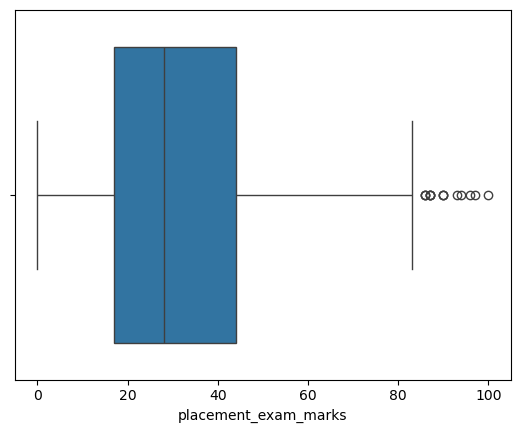

In [13]:
sns.boxplot(x = df['placement_exam_marks'])

In [15]:
# finding the IRQ (interquantile range)

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [17]:

percentile25

17.0

In [19]:
percentile75

44.0

In [23]:
IRQ = percentile75 - percentile25
IRQ

27.0

In [25]:
upper_limit = percentile75 + 1.5*IRQ
upper_limit

84.5

In [27]:
lower_limit = percentile25 - 1.5*IRQ
lower_limit

-23.5

## Finding our outliers

In [30]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [32]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [34]:
# Trimming ---> 4(Lower).....1 , upper(25).....(50) ---> here 1,50 are outliers --->
# Lower(4) <----> upper(25) mid data.

# Capping ----> 4(Lower).....1 , upper(25).....(50) ---> capping Lower point Lowest point(1)
# upper point upper point(50) ---> Range expand ---> outliers remove.


### Trimming (outlier removing technique)

In [44]:
newdf = df[df['placement_exam_marks'] < upper_limit]

In [46]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


## comparison

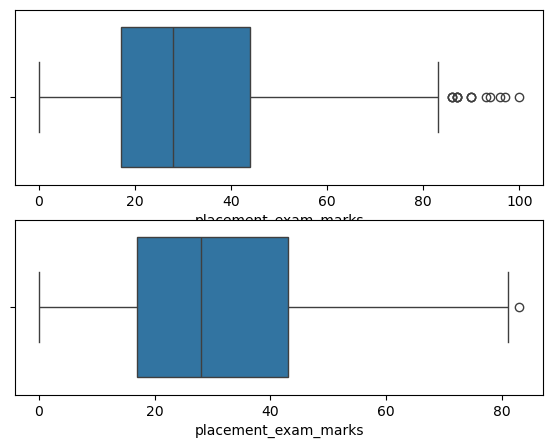

In [55]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x= df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x= newdf['placement_exam_marks'])
plt.show()

## Capping (outlier removing technique 2)

In [58]:
new_df_cap = df.copy()

In [60]:
# min = 5 , max 15

# min 4 , 3 , 1
# max = 20 , 30 , 50

# updated_min_value = 1
# updated_max_value = 50

In [62]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [64]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [66]:
new_df_cap.shape

(1000, 3)

In [68]:
## comparison

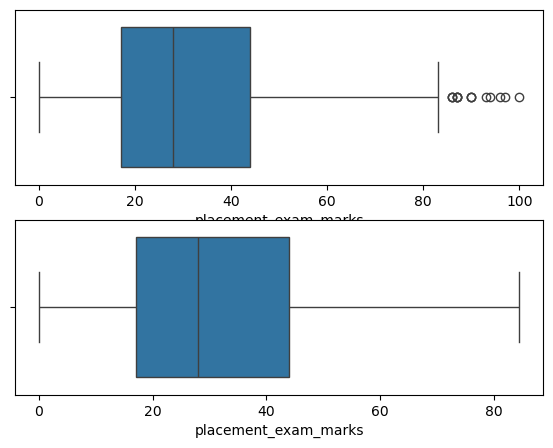

In [72]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x= df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x= new_df_cap['placement_exam_marks'])
plt.show()

In [ ]:
# capping is the more accurate technique to remove the outliers.
